# [Problem 32](https://www.cdslab.org/recipes/programming/stat-sample-chebyshev-inequality/stat-sample-chebyshev-inequality)

The Chebyshev Inequality states that no more than 1/k2 of an attribute values of a given sample can be k or more standard deviations away from the attribute mean. Provide an experimental proof of this theorem by generating a sample of 10000 uniformly-distributed random numbers between 0 and 1 and computing the fractions of points that lie at larger distances than [1σ,1.5σ,2σ,2.5σ,3σ,3.5σ,4σ] is less than or equal to [1,1/1.52,1/22,1/2.52,1/32,1/3.52,1/42].

In [1]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

In [2]:
sample= np.random.uniform(0,1,10000)

In [3]:
sample

array([0.34158101, 0.08593006, 0.35846753, ..., 0.01417607, 0.98552937,
       0.5863229 ])

In [5]:
def chevin(k):
    return 1- 1/(k**2)

In [23]:
nstd= 7 #len(stds)

In [12]:
chev_ineq= chevin(nstd)
chev_ineq*100 #percent

97.95918367346938

At least 98% of the data falls within 7 standard deviations of the mean for any random distribution.

In [15]:
mean=np.mean(sample)
std=np.std(sample)

In [17]:
print(mean)
print(std)

0.4979247354801497
0.29161978661516447


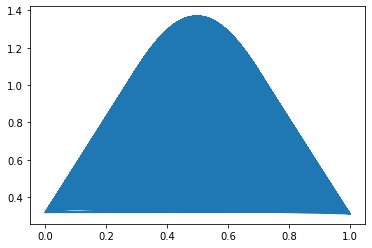

In [21]:
plt.plot(sample, norm.pdf(sample,mean, std))
plt.show()

In [29]:
#P(X>=μ+kσ|X<=μ−kσ)<=1/k2 ---> P(μ−kσ<=X<=μ−kσ)>1−1/k2
stds=[1,1.5,2,2.5,3,3.5,4] #kσ's

In [33]:
def cin_3(lst):
    vls=[]
    for val in lst:
        vls.append(1/(val**2))
    return vls   

In [39]:
frac_obs=cin_3(stds)

In [42]:
def cin_4(lst,mean,std):
    vls=[]
    for val in lst:
        vls.append(mean-(val*std))
    return vls 

In [43]:
k_std=cin_4(stds,mean,std)

In [45]:
#frac_obs can be farther than k_std from the mean
print("1/k^2 fractions of the observations:")
frac_obs

1/k^2 fractions of the observations:


[1.0,
 0.4444444444444444,
 0.25,
 0.16,
 0.1111111111111111,
 0.08163265306122448,
 0.0625]

In [46]:
print("k std:")
k_std

k std:


[0.20630494886498524,
 0.06049505555740298,
 -0.08531483775017923,
 -0.23112473105776143,
 -0.37693462436534375,
 -0.522744517672926,
 -0.6685544109805082]